In [ ]:
#importation des packages
import os 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import chardet

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving fichierQI.csv to fichierQI.csv


In [ ]:
import io
data_qi = pd.read_csv(io.BytesIO(data_to_load['fichierQI.csv']),sep = ';',
                      on_bad_lines='skip')

In [ ]:
data_qi

,Thématique,Titre,Contenu,Date,Heure,Contenu_texte,Numéro du post,Id de l Auteur,Références de l Auteur,Auteur1
0,Quotient intellectuel,Réécriture,"<post n=""0"" when-iso=""2004-04-30T00:53"" who=""p...",30/04/2004,00:53,Je viens de réécrire la page qui contenait de ...,0,cmr-wiki-c001-a1,NaN,psn:cmr-wikiconflits-p1723
1,Quotient intellectuel,Réécriture,"<post n=""1"" ref=""#cmr-wiki-c001-a1"" when-iso=""...",29/11/2004,00:31,\nil semble qu'on a ajouté beaucoup de choses ...,1,cmr-wiki-c001-a2,#cmr-wiki-c001-a1,psn:cmr-wikiconflits-p8915
2,Quotient intellectuel,Un morceau obscur,"<post n=""0"" when-iso=""2005-01-16T09:35"" who=""p...",16/01/2005,09:35,\nCi-dessous un copier-coller d'une partie de ...,0,cmr-wiki-c001-a3,NaN,psn:cmr-wikiconflits-p1453
3,Quotient intellectuel,Un morceau obscur,"<post n=""1"" ref=""#cmr-wiki-c001-a3"" when-iso=""...",28/01/2005,09:31,"c'est faux. La note (QI) est globale, mais il...",1,cmr-wiki-c001-a4,#cmr-wiki-c001-a3,psn:cmr-wikiconflits-p8915
4,Quotient intellectuel,Lapsus et calembour,"<post n=""0"" when-iso=""2005-03-29T13:25"" who=""p...",29/03/2005,13:25,"""On peut programmer assez facilement un ordina...",0,cmr-wiki-c001-a5,NaN,psn:cmr-wikiconflits-p13782
...,...,...,...,...,...,...,...,...,...,...
154,Quotient intellectuel,NaN,"<post n=""7"" ref=""#cmr-wiki-c001-a154"" when-iso...",08/09/2013,18:17,\nNon. \nIluvalar\n (d)\n ...,7,cmr-wiki-c001-a155,#cmr-wiki-c001-a154,psn:cmr-wikiconflits-p302986
155,Quotient intellectuel,NaN,"<post n=""7"" ref=""#cmr-wiki-c001-a154"" when-iso...",08/09/2013,19:22,\nSi vous y tenez il y a Wikipédia:Contestatio...,7,cmr-wiki-c001-a156,#cmr-wiki-c001-a154,psn:cmr-wikiconflits-p302986
156,Quotient intellectuel,NaN,"<post n=""8"" ref=""#cmr-wiki-c001-a156"" when-iso...",08/09/2013,23:47,\n@ Iluvalar : Avant d'indiquer à 88.147.xxx.x...,8,cmr-wiki-c001-a157,#cmr-wiki-c001-a156,psn:cmr-wikiconflits-p6155
157,Quotient intellectuel,NaN,"<post n=""1"" ref=""#cmr-wiki-c001-a148"" when-iso...",08/09/2013,23:36,\nPfff... Je trouve que certains ont bien du t...,1,cmr-wiki-c001-a158,#cmr-wiki-c001-a148,psn:cmr-wikiconflits-p6155


In [ ]:
!pip install WordCloud
#from wordcloud import WordCloud as wc 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import re
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
import io
from nltk.tokenize import word_tokenize
!pip install nltk
import nltk
from nltk.corpus import stopwords
stopwords = set(nltk.corpus.stopwords.words('english')) | set(nltk.corpus.stopwords.words('french'))
print(stopwords)

LookupError: ignored

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
final_stopwords_list = stopwords.words('french')
print(stopwords.words('french'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayant

In [ ]:
#Bonne solution
#Découpage en mots plutôt qu'en phrases
from collections import Counter
mots_qi = Counter(" ".join(data_qi['Contenu_texte'].values.tolist()).split(" "))
mots_qi


#nettoyer les données en retirant les espaces
tes=['\n',' ', '','!',':','?','(d)',"qu'ils",'autres','sur','sur\n','2',"ans",'2011','juillet',"n'ont",'souvent','faudrait','Ce','Par','ou\n','mars','juin',"J'ai",'faudrait','dit','donner','\n81.65.27.14','2006','sont\n','parce','avoir','dire','Que','ces\n',';','10','4','5','encore','surtout','(CET)','une\n','entre','très','plus','faut','1','3','tout',"qu'un",'»',"n'ai",'On','depuis','toute','doit','ceux','26','qui\n','est\n','fait',"n'y",'peut',"n'a",'là',"n'est","qu'à","d'autres","d'un","qu'une","qu'il","qu'on","C'est","d'une","j'ai",'cela','faire','sans','cas','être','dans\n','2008','ici','2013','novembre','ça','à','de','et','la','Mais','en\n','si','Si','du\n','En','Si','le\n','un\n','un\n','celui','Et','cet','aussi','La','des\n','deux', 'Les','Je','\nJe','par\n','pas\n','pour\n','(et','que','le','les','des','à\n','tous','et\n', 'les\n','Il','en','un','est','Le','alors',"l'on",'quand','que\n','«','8','dans','ce','qui','septembre','octobre','comme','cette','la\n', 'que',"c'est", 'quoi', 'dont','|','(d)\n', 'où','(CEST)','mais', 'ou', 'donc', 'or', 'ni', 'car','2009','2010','2005','a','de\n','-']
test=stopwords.words('french')


for elem in test:
    while elem in mots_qi:
        del mots_qi[elem]
for elemi in tes:
  while elemi in mots_qi:
        del mots_qi[elemi]
    
occur = mots_qi.most_common(100)#compter le nombre d'occurrences pour les 100 mots les plus fréquents après suppression des espaces
occur


[('QI', 90),
 ('bien', 58),
 ('tests', 41),
 ('article', 29),
 ('non', 25),
 ('test', 25),
 ("l'intelligence", 24),
 ('moins', 22),
 ('mesure', 21),
 ("l'article", 21),
 ('personne', 20),
 ('moyenne', 20),
 ('peu', 20),
 ('Q.I', 20),
 ('page', 18),
 ('semble', 18),
 ('point', 18),
 ('capacité', 17),
 ('rien', 17),
 ('sources', 17),
 ('points', 16),
 ('thèses', 16),
 ('scientifique', 16),
 ('théories', 16),
 ('corrélation', 16),
 ('trop', 14),
 ('QI,', 14),
 ('aucun', 14),
 ('rapport', 14),
 ('différences', 14),
 ('beaucoup', 13),
 ('assez', 13),
 ('lieu', 13),
 ('cause', 13),
 ('référence', 13),
 ('lien', 13),
 ('partie', 12),
 ('raisonnement', 12),
 ('gens', 12),
 ('questions', 12),
 ('population', 12),
 ("l'article,", 12),
 ('personnes', 12),
 ('contre', 12),
 ('articles', 12),
 ('parle', 11),
 ('sujet', 11),
 ('également', 11),
 ('vue', 11),
 ('résultats', 11),
 ('simplement', 11),
 ('moyen', 11),
 ('selon', 11),
 ('savoir', 11),
 ('temps', 11),
 ('aucune', 11),
 ('toutes', 11),
 ('

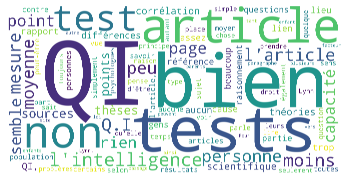

In [ ]:
#Brouillons

# Nouvelle version du code pour les mots les plus fréquents après suppression de la ponctuation

#Créer et génèrer le nuage de mots avec les 100 mots les plus fréquents
wc = WordCloud(collocations = False, background_color = 'white',height=1000,width=2000,max_words=100,scale=7)

#Génèrer les fréquences avec la collection créée en amont
wc.generate_from_frequencies(mots_qi)


# Permet de générer le nuage de mots

plt.imshow(wc, interpolation='bilinear')
#fig = plt.figure(1, figsize=(70, 70))
plt.axis("off")
plt.savefig('figsize_test_qi.png',dpi=200)
plt.show()